测试另外一个数据集

[0.69314718]
[0.6931021]
[0.69305708]
[0.69301214]
[0.69296728]
[0.69292248]
[0.69287776]
[0.6928331]
[0.69278852]
[0.69274401]
[0.69269956]
[0.69265519]
[0.69261089]
[0.69256665]
[0.69252249]
[0.69247839]
[0.69243436]
[0.69239039]
[0.6923465]
[0.69230267]
[0.6922589]
[0.69221521]
[0.69217158]
[0.69212801]
[0.69208451]
[0.69204107]
[0.6919977]
[0.6919544]
[0.69191115]
[0.69186797]
[0.69182486]
[0.6917818]
[0.69173881]
[0.69169588]
[0.69165301]
[0.69161021]
[0.69156746]
[0.69152478]
[0.69148216]
[0.69143959]
[0.69139709]
[0.69135465]
[0.69131227]
[0.69126994]
[0.69122768]
[0.69118547]
[0.69114332]
[0.69110123]
[0.6910592]
[0.69101722]
[0.6909753]
[0.69093344]
[0.69089164]
[0.69084989]
[0.6908082]
[0.69076656]
[0.69072498]
[0.69068345]
[0.69064198]
[0.69060056]
[0.6905592]
[0.69051789]
[0.69047664]
[0.69043544]
[0.69039429]
[0.6903532]
[0.69031216]
[0.69027117]
[0.69023023]
[0.69018935]
[0.69014852]
[0.69010773]
[0.690067]
[0.69002633]
[0.6899857]
[0.68994512]
[0.68990459]
[0.68986412]
[

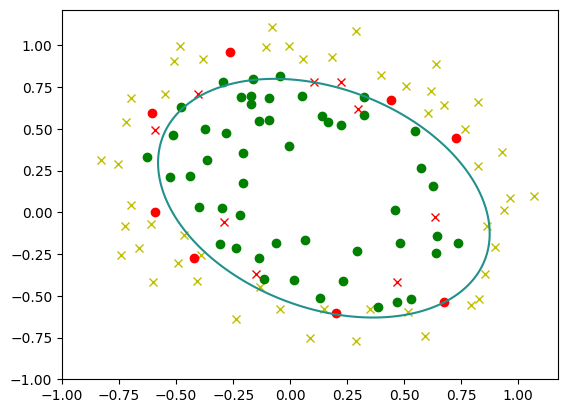

In [1]:
from matplotlib import pyplot as plt
# 构造特征,加入X^2特征
import numpy as np

data = np.loadtxt("data2.txt", delimiter=",")
X = data[:,0:-1]
y = data[:,-1]
m = len(y)

for i in range(X.shape[1]):
    temp = X[:,i]
    temp = temp * temp
    temp = temp.reshape(-1, 1)
    X = np.column_stack((X, temp))

temp = X[:,0] * X[:,1]
X = np.column_stack((X, temp))

X = np.column_stack((X, np.ones((m, 1))))

# 定义新的w
w = np.zeros((X.shape[1],1))

# 学习率
alpha = 0.01

temp = 0
J = 1

# 梯度下降
while abs(J - temp) > 0.0000001:
    temp = J
    J = (-1.0) / m * (np.dot(np.transpose(y), np.log(1.0 / (1.0 + np.exp(-1.0 * np.dot(X, w))))) + np.dot(np.transpose(1 - y), np.log(1.0 - 1.0 / (1.0 + np.exp(-1.0 * np.dot(X, w))))))
    w = w - alpha / m * np.dot(np.transpose(X), (1.0 / (1.0 + np.exp(-1.0 * np.dot(X, w))) - y.reshape(-1, 1)))
    print(J)

print(w)

# 测试训练结果
f = 0
result = 1.0 / (1.0 + np.exp(-1 * np.dot(X, w)))

for i in range(m):
    if result[i] > 0.5:
        result[i] = 1
    else:
        result[i] = 0
    if result[i] != y[i]:
        f += 1
        if y[i] == 0:
            y[i] = 2
        else:
            y[i] = 3

print("预测结果与数据不符的个数为: ", f,
      "\n准确度为: ", 1.0 - f / m)

# 画图感受一下训练结果
class1 = np.where(y == 0)
class2 = np.where(y == 1)
class3 = np.where(y == 2)
class4 = np.where(y == 3)
plt.plot(X[class1, 0], X[class1, 1], 'yx')
plt.plot(X[class2, 0], X[class2, 1], 'go')
plt.plot(X[class3, 0], X[class3, 1], 'rx')
plt.plot(X[class4, 0], X[class4, 1], 'ro')

# 绘制决策边界，具体实现方法就是绘制计算图中采样点的值，并且将其等于0的等高线绘制出来
# 采样点
u = np.linspace(-1, 1, 500)
v = np.linspace(-1, 1, 500)

# 计算采样点取值
sample = np.zeros((len(u),len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        temp = [u[i], v[j], u[i] * u[i], v[j] * v[j], u[i] * v[j], 1]
        sample[i, j] = np.dot(temp, w)


plt.contour(u, v, sample, 0)
plt.show()